## **ST4: Patrones con K-means**


### **Parte 1: Modelo matemático**

In [72]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf

**Selección de datos**

In [73]:
datos_spoti = pd.read_csv("songs_normalize.csv") # campos: artist, song, duration_ms, explicit, year, popularity, danceability, energy, key, loudness, mode, speechiness,acousticness, instrumentaliness, liveness, valence, tempo, genre

Utilizaremos únicamente los siguientes datos en nuestro análisis
*   Artist
*   Year
*   Popularity
*   Genre
*   Energy
*   Danceability
*   Instrumntalness
*   Speechiness

**Anteriormente, también utilizamos la variable *song*, pero después de la actividad anterior, decidimos omitirla porque no aporta realmente para el análisis estadístico que deseamos hacer en este proyecto.**

In [74]:
artist = datos_spoti['artist']
year = datos_spoti['year']
popularity = datos_spoti['popularity']
genre = datos_spoti['genre']
energy  = datos_spoti['energy']
dance  = datos_spoti['danceability']
instrumental  = datos_spoti['instrumentalness']
speech  = datos_spoti['speechiness']

spoti = {
    "artist": artist,
    "year": year,
    "popularity": popularity,
    "genre": genre,
    "energy": energy,
    "dance": dance,
    "instrumental": instrumental,
    "speech": speech
}
spoti = pd.DataFrame(spoti)
spoti

spotinum = {
    "popularity": popularity,
    "energy": energy,
    "dance": dance
}
spotinum = pd.DataFrame(spotinum)

ed = {
    "energy": energy,
    "dance": dance
}
ed = pd.DataFrame(ed)



**Limpieza de los datos**

In [75]:
spoti.isnull().values.any() #Si imprime "false" es porque todos los valores son válidos

dataset = spoti.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

# Como da 0 en cada columna, podemos avanzar.

artist          0
year            0
popularity      0
genre           0
energy          0
dance           0
instrumental    0
speech          0
dtype: int64

**Preparación de datos**

In [76]:
dataset.columns
x = dataset[['year']].values
y = dataset['dance'].values

In [77]:
x1 = dataset['dance']
y1 = dataset[['energy']]


In [78]:
x2 = dataset['genre']
y2 = dataset[['popularity']]

In [79]:
x3 = dataset["instrumental"]

In [80]:
Vx = dataset[['speech','energy','instrumental','popularity']]
Dy = dataset['dance']

In [81]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

X_train, X_test, y_train, y_test = train_test_split(Vx, Dy, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prue(ba
#print(X_train)

**Modelo de regresión lineal:**

Coeficiente de correlación de Pearson:  0.03353246302645296
P-value:  0.1338473367206135


Text(0, 0.5, 'Bailabilidad')

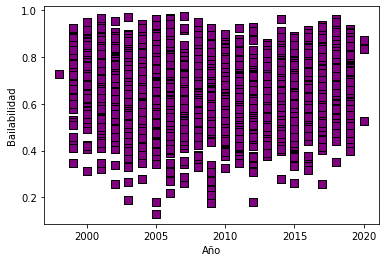

In [95]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = spoti['year'], y =  spoti['dance'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

plt.scatter(
    year, dance,
    s=50, c='purple',
    marker='s', edgecolor='black',
)
plt.xlabel('Año')
plt.ylabel('Bailabilidad')

Coeficiente de correlación de Pearson:  [-0.10403836408435745]
P-value:  3.1241303646488204e-06


Text(0, 0.5, 'Energía')

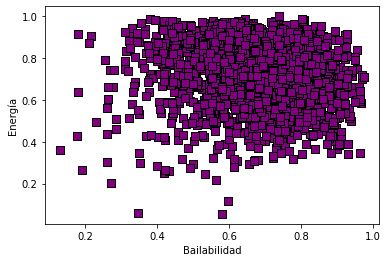

In [83]:
corr_test = pearsonr(x1,y1)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

plt.scatter(
    x1, y1,
    s=50, c='purple',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.xlabel('Bailabilidad')
plt.ylabel('Energía')

Coeficiente de correlación de Pearson:  0.14558968510214182
P-value:  6.079013606698906e-11


Text(0, 0.5, 'Bailabilidad')

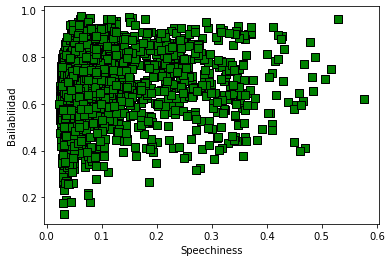

In [91]:
# SPEECHINESS VS. DANCEABILITY

corr_test = pearsonr(x = spoti['speech'], y =  spoti['dance'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

plt.scatter(
    speech, dance,
    s=50, c='green',
    marker='s', edgecolor='black',
)
plt.xlabel('Speechiness')
plt.ylabel('Bailabilidad')

Coeficiente de correlación de Pearson:  0.023207307550550543
P-value:  0.2995712822605574


Text(0, 0.5, 'Bailabilidad')

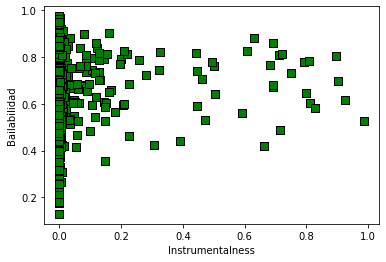

In [84]:
# INSTRUMENTALNESS VS. DANCEABILITY

corr_test = pearsonr(x = spoti['instrumental'], y =  spoti['dance'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

plt.scatter(
    instrumental, dance,
    s=50, c='green',
    marker='s', edgecolor='black',
)
plt.xlabel('Instrumentalness')
plt.ylabel('Bailabilidad')

Coeficiente de correlación de Pearson:  -0.10403836408435757
P-value:  3.124130364648804e-06


Text(0, 0.5, 'Bailabilidad')

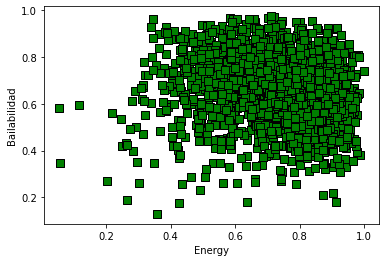

In [93]:
# ENERGY VS. DANCEABILITY

corr_test = pearsonr(x = spoti['energy'], y =  spoti['dance'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

plt.scatter(
    energy, dance,
    s=50, c='green',
    marker='s', edgecolor='black',
)
plt.xlabel('Energy')
plt.ylabel('Bailabilidad')

Coeficiente de correlación de Pearson:  -0.0035457302658119076
P-value:  0.8740854802420611


Text(0, 0.5, 'Bailabilidad')

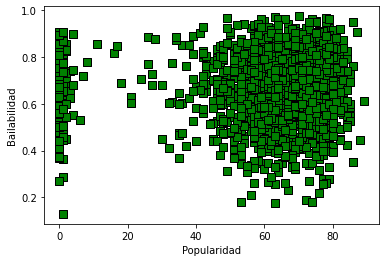

In [94]:
# POPULARITY VS. DANCEABILITY

corr_test = pearsonr(x = spoti['popularity'], y =  spoti['dance'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

plt.scatter(
    popularity, dance,
    s=50, c='green',
    marker='s', edgecolor='black',
)
plt.xlabel('Popularidad')
plt.ylabel('Bailabilidad')

**Modelo de regresión múltiple:**

In [98]:
Vx = sm.add_constant(Vx)   # se agrega la intercepción, la ordenada al origen (beta_0) el modelo

modelo = sm.OLS(Dy, Vx).fit()

predictions = modelo.predict(Vx)  # Con el modelo, se calculan las Y´s

modelo.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  dance   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     16.33
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.59e-13
Time:                        15:33:50   Log-Likelihood:                 1121.1
No. Observations:                2000   AIC:                            -2232.
Df Residuals:                    1995   BIC:                            -2204.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7120      0.018     39.942      0.000       0.677       0.747
speech           0.2080      0.032      6.441      0.000       0.145       0.271
energy          -0.0895      0.020     -4.409      0.000      -0.129      -0.050
instrumental     0.0569      0.035      1.608      0.108      -0.012       0.126
popularity   -4.091e-05      0.000     -0.282      0.778      -0.000       0.000
==============================================================================
Omnibus:                       85.701   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.868
Skew:                          -0.522   Prob(JB):                     1.52e-21
Kurtosis:                       3.243   Cond. No.                         734.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

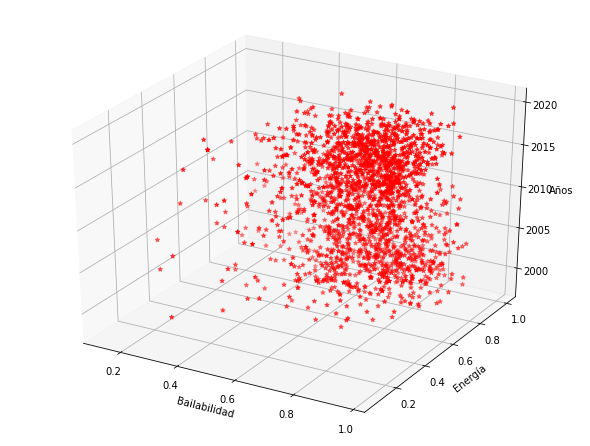

In [86]:
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
import random                             # Permiten obtener de distintos modos números aleatorios

fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

x_1 = spoti["dance"]                            # Datos eje X
x_2 = spoti["energy"]                           # Datos eje Y
Y = spoti["year"]                               # Datos eje Z (Var. Respuesta)

ax.scatter(x_1, x_2, Y, marker='*', c='r')
ax.set_xlabel('Bailabilidad')        # Etiqueta del eje X
ax.set_ylabel('Energía')       # Etiqueta del eje Y
ax.set_zlabel('Años');        # Etiqueta del eje Z (Var. Respuesta)

In [87]:
mod = smf.ols('Y ~ x_1 + x_2', data=spoti).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.44
Date:                Fri, 13 May 2022   Prob (F-statistic):           4.28e-06
Time:                        15:21:48   Log-Likelihood:                -6361.3
No. Observations:                2000   AIC:                         1.273e+04
Df Residuals:                    1997   BIC:                         1.275e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2011.8060      0.931   2160.771      0.0

In [88]:
mod = smf.ols('Dy ~ Vx', data=spoti).fit()  # Ajusta el modelo usando el registro natural de uno de los regresores
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                     Dy   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     16.33
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.59e-13
Time:                        15:21:53   Log-Likelihood:                 1121.1
No. Observations:                2000   AIC:                            -2232.
Df Residuals:                    1995   BIC:                            -2204.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7120      0.018     39.942      0.0

In [89]:
corr_test = pearsonr(Vx, Dy)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

plt.scatter(
    Vx, Dy,
    s=50, c='green',
    marker='s', edgecolor='black',
)
plt.xlabel('Instrumentalness')
plt.ylabel('Bailabilidad')

ValueError: ignored

### **Parte 2: Análisis de la Modelación de los datos**



**1. ¿Cuántos intentos o corridas realizaste para obtener los resultados sin errores? Porqué**

En el primer intento obtuvimos los resultados esperados, por lo que no hubo ningún error durante la elaboración del código.

**2. ¿Cómo los resolviste los problemas que se presentaron?**

Debido a que no obtuvimos errores, no tuvimos la oportunidad de resolver ningún problema.

**3. ¿Qué resultados arrojó el análisis? Incluye imagen de cada resultado y explica cada uno de los resultados:**

https://www.canva.com/design/DAFAge9zNB8/4JclXCuB6dQ4_TUzYlVDXQ/edit?utm_content=DAFAge9zNB8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

**4. ¿Cuáles son tus conclusiones de la modelación?**

Después de realizar el análisis, nos dimos cuenta que las variables que seleccionamos no fueron las mejores. Los resultados que obtuvimos nos permitieron ver que las variables que escogimos no tenían mucha codependencia entre ellas.
\
Otra posibilidad podría ser que el modelo de regresión lineal no era la mejor opción para analizar las variables que seleccionamos y tal vez con otro modelo se puede llegar a obtener mejores resultados. 

#**Extra:** 

###**Continuando con el análisis de variables**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Diagarama de dispersión**

Text(0, 0.5, 'Bailabilidad')

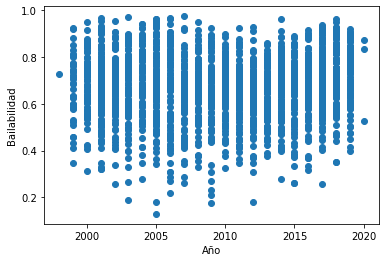

In [ ]:
plt.scatter(x,y)
plt.xlabel('Año')
plt.ylabel('Bailabilidad')

Text(0, 0.5, 'Energía')

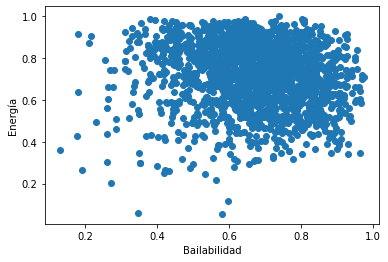

In [ ]:
plt.scatter(x1,y1)
plt.xlabel('Bailabilidad')
plt.ylabel('Energía')


Text(0, 0.5, 'Popularidad')

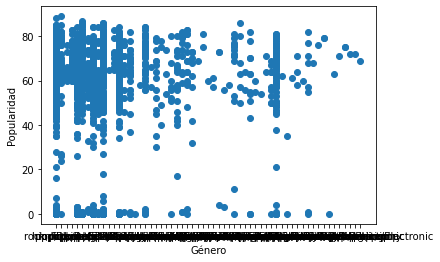

In [ ]:
plt.scatter(x2,y2)
plt.xlabel('Género')
plt.ylabel('Popularidad')

#plt.xticks(rotation=90)

### **Histogramas**


1.   Popularidad de las canciones



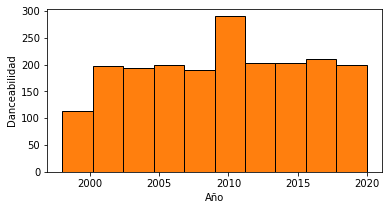

In [ ]:
fig,ax = plt.subplots(figsize = (6,3))

ax.hist(y, ec = 'white')
ax.hist(x, ec = 'black')
plt.xlabel('Año')
plt.ylabel('Danceabilidad')
plt.show()

2.   Energía y bailabilidad de las canciones


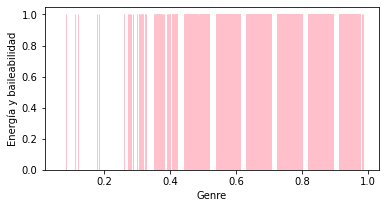

In [ ]:
fig,ax = plt.subplots(figsize = (6,3))

ax.hist(y1, ec = 'pink')
plt.xlabel('Genre')
plt.ylabel('Energía y baileabilidad')
plt.show()

### **Boxplot**

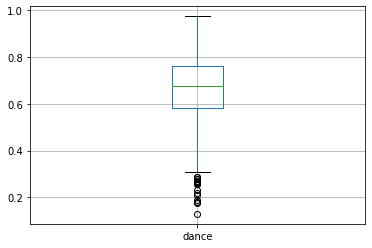

In [ ]:
boxplot1 = dataset.boxplot(column = ['dance'])
boxplot1.plot()
plt.show()

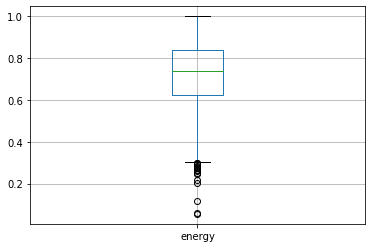

In [ ]:
boxplot2 = dataset.boxplot(column = ['energy'])
boxplot2.plot()
plt.show()

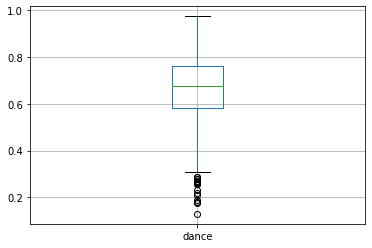

In [ ]:
boxplot3 = dataset.boxplot(column = ['dance'])
boxplot3.plot()
plt.show()

### **Mapa de calor**

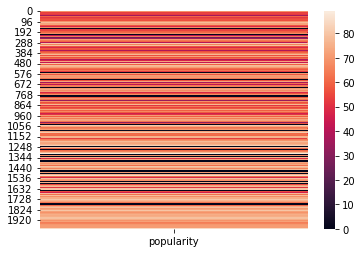

In [ ]:
sns.heatmap(spotinum[['popularity']])

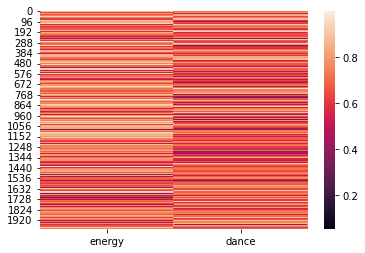

In [ ]:
sns.heatmap(ed)

### **Preguntas acerca de análisis de variables**

**¿Hay alguna variable que no aporta información?**
Creo que la variable con el nombre de la canción (*song*) pudimos no incluirla y no afectaría al análisis. Si lo pensamos, los nombres de las canciones no se van a repetir, lo que significa que tendríamos 2000 datos diferentes y no creo que sirva mucho analizarlo.


**Si tuvieras que eliminar variables, ¿Cuáles quitarías y por qué?**
En este proyecto en específico, hubiera sido posible eliminar la variable de *song* que da el nombre de la canción que se analiza. Esta variable no es necesaria para ninguna de nuestras comparaciones ni tablas, y aunque podría resultar importante para distinguir un dato en específico, no llega a utilizarse en este proyecto de análisis.


**¿Existen variables que tengan datos extraños?**
Todas las variables tienen elementos predecibles, excepto por una: **género**. En esta variable, podemos encontrar datos como “pop”, “rock” y “punk”, pero igualmente algunos ejemplos de géneros combinados, incluyendo “pop, rock”, “electrónica, pop” y “rock, punk”, que hicieron mucho más complicado el análisis en el que comparábamos esta variable con otras.

**Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?**
Aún con la naturaleza compleja de nuestros datos cualitativos, los cuantitativos se encontraban en rangos similares. Esto fue perfecto para algunas de nuestras comparaciones, por ejemplo entre *año* y *bailabilidad*, porque pudimos encontrar la correlación entre ambos sin cambiar en absoluto los datos.

**¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son éstos?**
Los grupos de datos que más se parecen son *bailabilidad* y *energía*. Esto se debe a que las dos variables se miden con un índice que va del 0 al 1, y permiten una comparación más comprensiva, lo cual hace que su interpretación sea más sencilla de realizar.


In [ ]:
import statsmodels.api as sm

modelo = sm.OLS(y,x).fit()
predictions = modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   year   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.246e+33
Date:                Thu, 12 May 2022   Prob (F-statistic):                        0.00
Time:                        23:25:16   Log-Likelihood:                          52168.
No. Observations:                2000   AIC:                                 -1.043e+05
Df Residuals:                    1999   BIC:                                 -1.043e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   1.27e-17    7.9e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     5183.441   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.000
Skew:                           0.000   Prob(JB):                    1.38e-163
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""